In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import dataset_creation as dc
import model_pipeline as mp
import model_testing as mt
import outlier_removal as outrem

In [2]:
df_train= dc.dataset_creation()

Color green
Year 2021
Month 01


In [3]:
df_val= dc.dataset_creation()

Color green
Year 2021
Month 02


In [4]:
df_train_clean = outrem.remove_outliers_iqr(df_train,'duration')

In [5]:
#sns.distplot(df_train_clean['duration'])

In [6]:
#df_train_clean['duration'].describe()

In [11]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']
target = 'duration'

#df_X_train = df_train_clean[categorical + numerical]
df_X_train = df_train[categorical + numerical]
Y_train = df_train[target]

X_val = df_val[categorical + numerical]
y_val = df_val[target]

In [12]:
X_train, dv = mp.train_preset(df_X_train)

In [13]:
X_test = mp.val_preset(X_val, dv)

In [14]:
model = mp.train_model(df_X_train,df_train,target)

In [15]:
predict = mp.predict(model, df_X_train)

In [16]:
predict

array([19.07178234, 21.5952221 , 18.22024356, ..., 18.92285868,
       21.44524736, 20.92201395])

In [17]:
df_val['duration']

0        17.916667
1         6.500000
2        15.250000
3        18.233333
4         8.966667
           ...    
64567    10.000000
64568     9.000000
64569    14.000000
64570     7.000000
64571     7.000000
Name: duration, Length: 64572, dtype: float64

Mean Squared Error: 59.32
R² Score: 0.00


/workspaces/MLOps/01 - intro/model_testing.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspaces/MLOps/01 - intro/model_testing.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hi

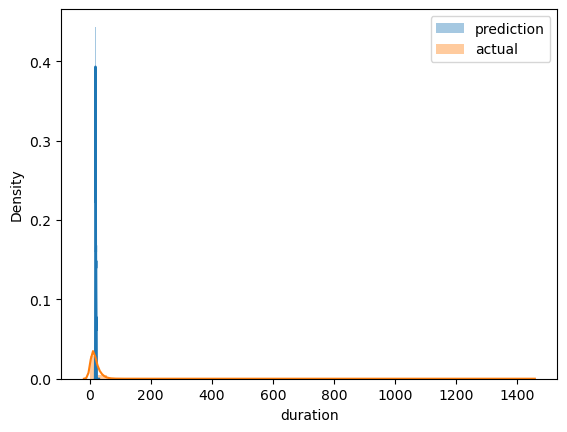

In [18]:
mt.model_evaluator(Y_train,predict)